In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [160]:
# Read preprocessed client data
data = pd.read_csv('client_clean.csv')
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year
0,24011ae4ebbe3035111d65fa7c15bc57,3,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,2,43.648,True,2013,2016
1,764c75f661154dac3a6c254cd082ea7d,3,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,0,13.856,False,2010,2016
2,bba03439a292a1e166f80264c16191cb,4,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,0,13.200,False,2010,2016
3,1aa498825382410b098937d65c4ec26d,6,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,33.12,33.12,1,118.89,4,2,13.200,True,2011,2016
4,7ab4bf4878d8f7661dfc20e9b8e18011,3,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,4.04,4.04,1,346.63,4,2,15.000,True,2011,2016


In [161]:
# Convert 'date_activ' column to datetime format
data['date_activ'] = pd.to_datetime(data['date_activ'], format='%Y-%m-%d')

# Convert 'date_end' column to datetime format
data['date_end'] = pd.to_datetime(data['date_end'], format='%Y-%m-%d')

# Convert 'date_modif_prod' column to datetime format
data['date_modif_prod'] = pd.to_datetime(data['date_modif_prod'], format='%Y-%m-%d')

# Convert 'date_renewal' column to datetime format
data['date_renewal'] = pd.to_datetime(data['date_renewal'], format='%Y-%m-%d')

data.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year
0,24011ae4ebbe3035111d65fa7c15bc57,3,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,2,43.648,True,2013,2016
1,764c75f661154dac3a6c254cd082ea7d,3,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,0,13.856,False,2010,2016
2,bba03439a292a1e166f80264c16191cb,4,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,0,13.200,False,2010,2016
3,1aa498825382410b098937d65c4ec26d,6,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,33.12,33.12,1,118.89,4,2,13.200,True,2011,2016
4,7ab4bf4878d8f7661dfc20e9b8e18011,3,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,4.04,4.04,1,346.63,4,2,15.000,True,2011,2016


# **Feature Engineering**

The feature engineering involves subtracting the off-peak prices in December from those in the preceding January of the preceding year. This calculation provides insight into how prices have changed between these two time periods.

The purpose of this feature engineering is to capture seasonal price variations or trends in energy prices over time. It may help in understanding how prices fluctuate between different periods and how these fluctuations might impact other variables of interest, such as customer behavior/churn or company revenues.

In [162]:
# Read price data
price_data = pd.read_csv('price_data.csv')
price_data["price_date"] = pd.to_datetime(price_data["price_date"], format='%Y-%m-%d')
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [163]:
# Grouping price_data by 'id' and 'price_date' and calculating the mean of off-peak prices
monthly_price_by_id = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Extracting the first entry of each 'id' group to get January prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()

# Extracting the last entry of each 'id' group to get December prices
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Merging December and January prices based on 'id'
diff = pd.merge(
    dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}),  # Renaming columns for December prices
    jan_prices.drop(columns='price_date'), on='id'  # Dropping 'price_date' from January prices and merging on 'id'
)

# Calculating the difference between December and January prices for energy and power
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']

# Selecting only the required columns
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]

diff.head()  # Displaying the first few rows of the resulting DataFrame


,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [164]:
# Merge the 'data' DataFrame with the 'diff' DataFrame based on 'id'
data = pd.merge(data, diff, on='id')
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,3,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2,678.99,3,2,43.648,True,2013,2016,0.020057,3.700961
1,764c75f661154dac3a6c254cd082ea7d,3,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,1,6.60,6,0,13.856,False,2010,2016,-0.004670,0.177779
2,bba03439a292a1e166f80264c16191cb,4,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,1,25.46,6,0,13.200,False,2010,2016,-0.004547,0.177779
3,1aa498825382410b098937d65c4ec26d,6,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,1,118.89,4,2,13.200,True,2011,2016,-0.008087,-0.000001
4,7ab4bf4878d8f7661dfc20e9b8e18011,3,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,1,346.63,4,2,15.000,True,2011,2016,-0.004628,0.000000


**Refining Features through Granular Time Intervals**

By computing the average price changes over specific time intervals rather than considering the entire year, we can refine the feature created by our colleague and enhance our understanding of pricing dynamics. This approach enables us to capture more granular insights into how prices fluctuate over time, offering a more nuanced perspective on seasonal variations and pricing trends. Breaking down the analysis into smaller time periods, such as months or quarters, allows us to identify subtle patterns and fluctuations that may have been overlooked when examining annual averages. By incorporating these more detailed features into our analysis, we can potentially improve the accuracy of predictive models and gain deeper insights into the factors driving price changes, thereby enhancing decision-making processes related to pricing strategies and market dynamics.

In [165]:
# Grouping price_data by 'id' and calculating the mean of different price variables
# Reset the index to convert the grouped DataFrame to a flat structure
mean_prices = price_data.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean',
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean',
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

In [166]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [167]:
# Define the columns for the new DataFrame 'data' after merging with mean_prices DataFrame
columns = ['id',  # 'id' column from mean_prices DataFrame
           'off_peak_peak_var_mean_diff',
           'peak_mid_peak_var_mean_diff',
           'off_peak_mid_peak_var_mean_diff',
           'off_peak_peak_fix_mean_diff',
           'peak_mid_peak_fix_mean_diff',
           'off_peak_mid_peak_fix_mean_diff']

# Merge the 'data' DataFrame with selected columns from mean_prices DataFrame based on 'id'
data = pd.merge(data, mean_prices[columns], on='id')

# Display the first few rows of the resulting merged DataFrame
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,contract_start_year,contract_end_year,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,3,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2013,2016,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.45067,26.040925
1,764c75f661154dac3a6c254cd082ea7d,3,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,2010,2016,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.00000,44.385450
2,bba03439a292a1e166f80264c16191cb,4,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,2010,2016,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.00000,44.400265
3,1aa498825382410b098937d65c4ec26d,6,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,2011,2016,-0.008087,-0.000001,0.081320,0.087632,0.168953,44.266930,0.00000,44.266930
4,7ab4bf4878d8f7661dfc20e9b8e18011,3,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,2011,2016,-0.004628,0.000000,0.081316,0.084744,0.166061,44.266930,0.00000,44.266930


This feature is beneficial as it builds upon the already insightful functionality identified by your colleague, adding further granularity to the analysis. By incorporating mean average price disparities across various time periods (off-peak, peak, mid-peak), we gain a more detailed understanding of pricing dynamics. While the feature comparing December to January captures macro trends occurring over the course of a year, the newly added inter-time-period features provide insights on a micro scale, revealing patterns and fluctuations between individual months. This combination of macro and micro perspectives allows for a comprehensive analysis of price variations, enabling us to identify both long-term trends and short-term fluctuations in pricing strategies. Ultimately, these enhanced features contribute to a more nuanced and informative analysis, empowering decision-making processes related to pricing strategies and market dynamics.

**Leveraging Maximum Price Changes Across Periods and Months**

Analyzing the maximum price changes across different periods and months provides valuable insights into the most significant fluctuations in pricing over time. This approach enhances the functionality introduced by your colleague by focusing on extreme variations rather than average trends. By identifying the periods or months with the largest price variations, we can pinpoint crucial moments of pricing volatility or strategic adjustments. For example, identifying the month with the highest price increase compared to the previous month could highlight seasonal demand spikes or pricing adjustments in response to market conditions. Similarly, identifying the period with the largest price variation across different times of the day (off-peak, peak, mid-peak) could reveal shifts in pricing strategies or changes in consumption patterns.

In [168]:
# Aggregate average prices per period by company
mean_prices_by_month = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean',
                                                                     'price_peak_var': 'mean',
                                                                     'price_mid_peak_var': 'mean',
                                                                     'price_off_peak_fix': 'mean',
                                                                     'price_peak_fix': 'mean',
                                                                     'price_mid_peak_fix': 'mean'}).reset_index()

In [169]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [170]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [171]:
# Define the columns for the new DataFrame 'eda_data' after merging with max_diff_across_periods_months DataFrame
columns = ['id', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff',
           'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff',
           'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff']

# Merge the 'eda_data' DataFrame with selected columns from max_diff_across_periods_months DataFrame based on 'id'
data = pd.merge(data, max_diff_across_periods_months[columns], on='id')

data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,3,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.45067,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.266930
1,764c75f661154dac3a6c254cd082ea7d,3,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.00000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.444710
2,bba03439a292a1e166f80264c16191cb,4,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.00000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.444710
3,1aa498825382410b098937d65c4ec26d,6,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,0.168953,44.266930,0.00000,44.266930,0.082931,0.088815,0.171746,44.266931,0.000000,44.266931
4,7ab4bf4878d8f7661dfc20e9b8e18011,3,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,0.166061,44.266930,0.00000,44.266930,0.082931,0.085058,0.167989,44.266930,0.000000,44.266930


Integrating the feature of calculating maximum price changes across months and time periods from the viewpoint of a PowerCo client enhances churn prediction by addressing customer concerns about unexpected price fluctuations. Customers are sensitive to such changes as they may disrupt budgeting and prompt them to seek alternatives. By identifying periods with the largest price fluctuations, PowerCo can anticipate dissatisfaction and mitigate churn risk. Significant price increases within a short period serve as strong indicators of potential churn, prompting customers to explore better deals elsewhere. Incorporating this feature into churn prediction models allows PowerCo to tailor retention strategies effectively, maintaining customer satisfaction and business sustainability.

# **BONUS -  Feature Engineering**

Tenure is an important factor in customer relationship management as longer-tenured clients often demonstrate higher loyalty and stability. Understanding the tenure of clients allows PowerCo to assess customer retention, tailor service offerings, and implement targeted retention strategies. Additionally, tenure can provide insights into customer satisfaction, as long-standing clients are likely to have established relationships and familiarity with PowerCo's services.

In [172]:
# Calculate the tenure of clients by subtracting the 'date_activ' (date of activation) from the 'date_end' (end date)
# and dividing by the number of years (365 days) to get the tenure in years

data['tenure'] = ((data['date_end'] - data['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [173]:
# Group the data by 'tenure' and calculate the mean churn rate for each tenure group
# 'tenure' represents the duration of the client's association with PowerCo
# 'churn' indicates whether the client has churned (True) or not (False)
churn_by_tenure = data.groupby(['tenure']).agg({'churn': 'mean'})

# Sort the results by churn rate in descending order to identify the highest churn rates
churn_by_tenure_sorted = churn_by_tenure.sort_values(by='churn', ascending=False)

# Display the churn rates for each tenure group, sorted by churn rate in descending order
churn_by_tenure_sorted.head()


,churn
tenure,
2,0.176471
3,0.146185
4,0.127268
5,0.096347
8,0.076923


This analysis reveals a notable trend: clients with shorter tenures, particularly those within the first four months, exhibit a significantly higher likelihood of churning compared to clients with longer tenures. The difference in churn rates between clients with four months or less and those with five months of tenure is approximately 4%, indicating a substantial increase in churn risk at the four-month mark. This finding suggests that retaining clients beyond the initial four-month period represents a significant achievement in terms of long-term retention. Therefore, tenure emerges as a crucial factor influencing the likelihood of churn. This insight underscores the importance of considering client tenure in churn prediction models, as it provides valuable predictive power and highlights the need to focus on retaining clients during the critical early stages of their relationship with PowerCo.

**Transforming dates into months**

- "months_activ" represents the number of months a client has been active until the reference date.
- "months_to_end" indicates the number of months remaining on the contract until the reference date.
- "months_modif_prod" denotes the number of months since the last modification until the reference date.
- "months_renewal" signifies the number of months since the last renewal until the reference date.

These metrics provide insights into the duration of client activity, contract remaining, and timing of modifications and renewals relative to the reference date.

In [174]:
def convert_months(reference_date, eda_data, column):
    """
    Convert timedeltas in a column to months relative to a reference date.

    Parameters:
    - reference_date: The reference date to calculate the months from.
    - eda_data: DataFrame containing the column with timedeltas.
    - column: Name of the column containing timedeltas.

    Returns:
    - months: Series containing the calculated months.
    """
    # Calculate the timedelta between reference_date and values in the specified column
    time_delta = reference_date - eda_data[column]

    # Convert the timedelta to months and cast to integer
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)

    return months


In [175]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
data['months_activ'] = convert_months(reference_date, data, 'date_activ')
data['months_to_end'] = -convert_months(reference_date, data, 'date_end')
data['months_modif_prod'] = convert_months(reference_date, data, 'date_modif_prod')
data['months_renewal'] = convert_months(reference_date, data, 'date_renewal')

Insights:
- While dates represented as datetime objects aren't directly useful for predictive modeling, they serve as valuable inputs for creating features with predictive power.
- Intuitively, clients with longer tenures may exhibit higher loyalty to PowerCo, potentially impacting churn rates. Hence, the addition of the "months_activ" feature, indicating the duration of a client's activity with PowerCo.
- Considering the client's perspective, nearing the end of a contract may prompt various reactions, from seeking better deals to renewing the contract. Therefore, "months_to_end" could reveal patterns and behaviors related to the timing of churn.
- Recent updates to a client's contract might indicate satisfaction or engagement with PowerCo's services. Hence, "months_modif_prod" serves as an indicator of client engagement.
- Similarly, the duration since a client last renewed their contract may reflect their level of commitment and engagement. Thus, "months_renewal" could provide insights into client engagement and commitment levels.

In [176]:
# List of columns to be removed from the DataFrame
remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

# Drop the specified columns from the DataFrame
data = data.drop(columns=remove)

data.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,3,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.085483,0.146033,44.266930,8.145775,44.266930,3,30,5,1,6
1,764c75f661154dac3a6c254cd082ea7d,3,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.089162,0.172468,44.444710,0.000000,44.444710,6,67,3,67,8
2,bba03439a292a1e166f80264c16191cb,4,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.153133,44.444710,0.000000,44.444710,6,67,2,67,8
3,1aa498825382410b098937d65c4ec26d,6,8302,0,1998,796.94,1998,0.0,30.12,0.164775,...,0.088815,0.171746,44.266931,0.000000,44.266931,5,47,11,1,0
4,7ab4bf4878d8f7661dfc20e9b8e18011,3,45097,0,0,8069.28,0,0.0,0.00,0.166178,...,0.085058,0.167989,44.266930,0.000000,44.266930,5,48,10,48,0


**Check if transformations can be applied to any features**

In [177]:
data['has_gas']

0         True
1        False
2        False
3        False
4        False
         ...  
10826    False
10827     True
10828    False
10829    False
10830    False
Name: has_gas, Length: 10831, dtype: bool

In [178]:
data['channel_sales'].value_counts()

channel_sales
3    6722
4    1836
6    1369
1     888
5      11
0       3
2       2
Name: count, dtype: int64

In the output above, the last three categories have very few occurrences: 11, 3, and 2 respectively. These categories are almost entirely constant and provide very little information. Hence, we will drop these three dummy variables.

In [179]:
# Drop rows with values 11, 3, and 2 in the 'channel_sales' column
data = data[~data['channel_sales'].isin([5, 0, 2])]

# Check the value counts of 'channel_sales' column after dropping rows
data['channel_sales'].value_counts()


channel_sales
3    6722
4    1836
6    1369
1     888
Name: count, dtype: int64

In [180]:
data['origin_up'].value_counts()

origin_up
2    6438
0    2746
1    1630
3       1
Name: count, dtype: int64

Similar to the 'channel_sales' column, the last category in the output above exhibit very low frequency. Therefore, we will exclude this category from the features after creating dummy variables.

In [181]:
# Drop row with values 3 in the 'origin_up' column
data = data[~data['origin_up'].isin([3])]

# Check the value counts of 'origin_up' column after dropping rows
data['origin_up'].value_counts()


origin_up
2    6438
0    2746
1    1630
Name: count, dtype: int64

In this exercise, we're addressing the issue of highly skewed variables. Skewness can affect predictive models, especially parametric models that assume variables are normally distributed. Treating skewness is important for model performance and convergence speed. We can apply various transformations such as square root, cubic root, or logarithm to skewed variables to normalize their distributions. For this use case, we'll use the logarithm transformation for positively skewed features. However, since logarithm cannot be applied to values of 0, we'll add a constant of 1 to all values before transformation.

To assess the effectiveness of the transformation, we first want to examine the statistics of the skewed features. This will allow us to compare the distributions before and after the transformation.

In [182]:
# List of features that are highly skewed

skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

data[skewed].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,10814.0,175243.646662,612994.822708,0.0,5893.250000,14976.000000,44209.500000,6.207104e+06
cons_gas_12m,10814.0,28462.861753,170277.861654,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,10814.0,17503.031626,68170.114399,0.0,0.000000,847.000000,3634.500000,7.712030e+05
forecast_cons_12m,10814.0,1910.096961,2377.899307,0.0,518.637500,1161.460000,2479.902500,8.290283e+04
forecast_cons_year,10814.0,1391.159515,2859.401990,0.0,0.000000,341.000000,1756.750000,7.912700e+04
forecast_discount_energy,10814.0,1.074718,5.354653,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,10814.0,62.883950,65.579904,0.0,16.190000,18.880000,130.430000,5.993100e+02
forecast_price_energy_off_peak,10814.0,0.138375,0.022874,0.0,0.116509,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,10814.0,0.049934,0.049374,0.0,0.000000,0.083849,0.098861,1.680920e-01
forecast_price_pow_off_peak,10814.0,43.217622,2.942656,0.0,40.606701,44.311378,44.311378,5.926638e+01


In the statistical summary provided, we observe that the standard deviation for most of the features in the list of skewed variables is quite high. This suggests that these features exhibit considerable variability in their values, with some values deviating significantly from the mean. High standard deviations can indicate the presence of outliers or a wide range of values, which can contribute to the skewness observed in these features.

In [183]:
# Applying log10 transformation

data["cons_12m"] = np.log10(data["cons_12m"] + 1)
data["cons_gas_12m"] = np.log10(data["cons_gas_12m"] + 1)
data["cons_last_month"] = np.log10(data["cons_last_month"] + 1)
data["forecast_cons_12m"] = np.log10(data["forecast_cons_12m"] + 1)
data["forecast_cons_year"] = np.log10(data["forecast_cons_year"] + 1)
data["forecast_meter_rent_12m"] = np.log10(data["forecast_meter_rent_12m"] + 1)
data["imp_cons"] = np.log10(data["imp_cons"] + 1)

In [184]:
data[skewed].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,10814.0,4.268003,0.869402,0.0,3.770429,4.175425,4.645525,6.792889
cons_gas_12m,10814.0,0.747073,1.691659,0.0,0.000000,0.000000,0.000000,6.618528
cons_last_month,10814.0,2.325597,1.769981,0.0,0.000000,2.928396,3.560564,5.887169
forecast_cons_12m,10814.0,3.001997,0.614171,0.0,2.715700,3.065378,3.394610,4.918575
forecast_cons_year,10814.0,1.817109,1.576353,0.0,0.000000,2.534026,3.244957,4.898330
forecast_discount_energy,10814.0,1.074718,5.354653,0.0,0.000000,0.000000,0.000000,30.000000
forecast_meter_rent_12m,10814.0,1.521109,0.563686,0.0,1.235276,1.298416,2.118695,2.778376
forecast_price_energy_off_peak,10814.0,0.138375,0.022874,0.0,0.116509,0.143166,0.146348,0.273963
forecast_price_energy_peak,10814.0,0.049934,0.049374,0.0,0.000000,0.083849,0.098861,0.168092
forecast_price_pow_off_peak,10814.0,43.217622,2.942656,0.0,40.606701,44.311378,44.311378,59.266378


After applying the logarithm transformation, we can observe that the standard deviation for most of the features has decreased significantly. This reduction indicates that the values within these features are now more tightly clustered around the mean, making them more stable and predictable. Lower standard deviations suggest less variability in the data, which can lead to more reliable predictions in predictive models.

To further assess the effectiveness of the transformation and visualize the impact on the distributions, we will quickly examine the distributions of some of these features. This will help us understand how the transformation has affected the shape of the distributions and whether they have become more symmetric or normally distributed.

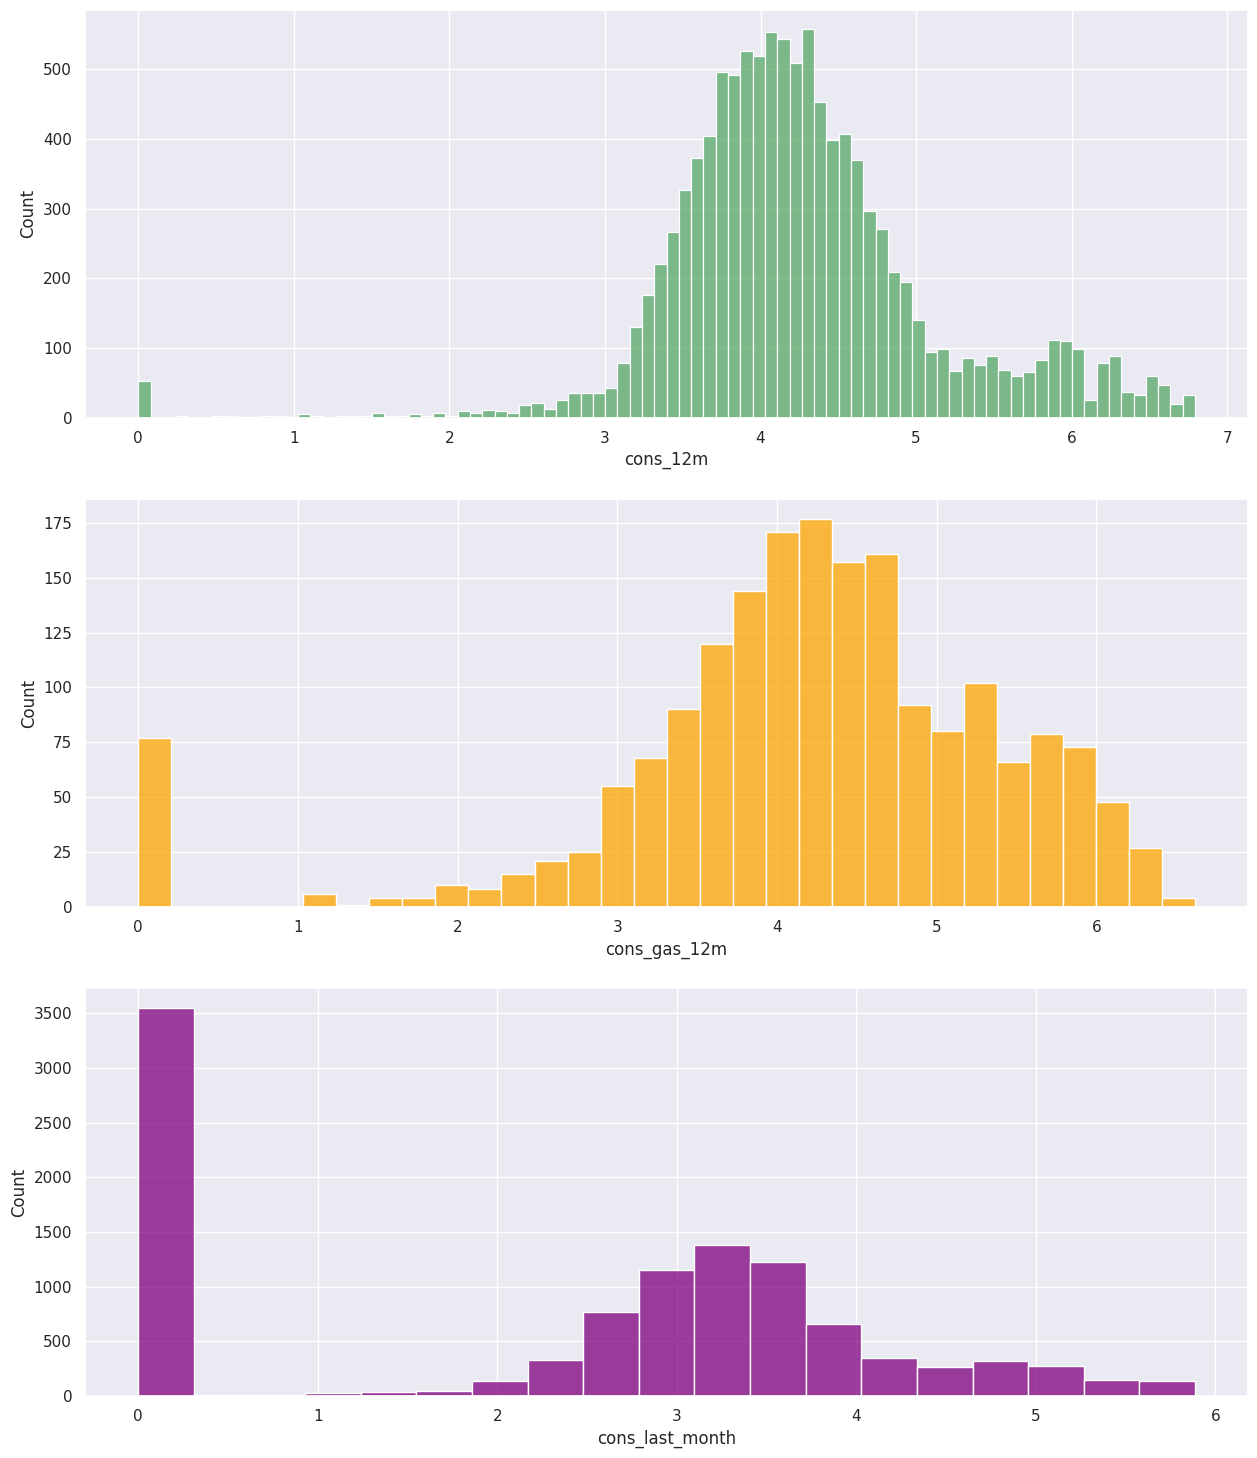

In [185]:
# Create subplots with 3 rows and a specified figure size
fig, axs = plt.subplots(nrows=3, figsize=(15, 18))

# Plot histograms for 'cons_12m' in the first subplot
sns.histplot((data["cons_12m"].dropna()), ax=axs[0], color='g')

# Plot histograms for 'cons_gas_12m' in the second subplot
sns.histplot((data[data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='orange')

# Plot histograms for 'cons_last_month' in the third subplot
sns.histplot((data["cons_last_month"].dropna()), ax=axs[2], color='purple')

# Show the plot
plt.show()



**Exploring Feature Correlations**

- **Trial and Error in Feature Engineering**: Feature engineering involves a lot of experimentation and iteration. It's not a one-time process but rather a continuous refinement based on model performance and predictive power. Through training predictive models, we can assess the effectiveness of the features and refine them accordingly.

- **Importance of Correlation Analysis**: Understanding the correlations between features is crucial. It helps identify linear relationships among variables. Ideally, we want features that correlate well with the target variable (in this case, churn) but have low correlation with each other to maintain independence assumptions in predictive modeling.

- **Impact of High Correlation**: High correlation between features can indicate redundancy or shared information, which violates the assumption of feature independence. This can affect the performance of parametric predictive models, leading to biased or less reliable results.

- **Desired Correlation Scenario**: The ideal scenario is features with high correlation with the target variable (churn) and low correlation with other independent features. However, achieving this perfect balance is rare, and some degree of correlation between independent features is common.

- **Objective of Correlation Analysis**: By examining feature correlations, we gain insights into the interdependencies among variables. This analysis guides us in selecting or refining features to improve model performance and predictive accuracy.

In [186]:
non_numeric_columns = data.select_dtypes(exclude='number').columns
print(non_numeric_columns)


Index(['id', 'has_gas', 'churn'], dtype='object')


In [187]:
# Convert boolean values to binary (1 and 0)
data['has_gas'] = data['has_gas'].astype(int)
data['churn'] = data['churn'].astype(int)

non_numeric_columns = data.select_dtypes(exclude='number').columns
print(non_numeric_columns)

Index(['id'], dtype='object')


In [188]:
data.drop(columns=['id'], inplace=True)

In [189]:
correlation = data.corr()

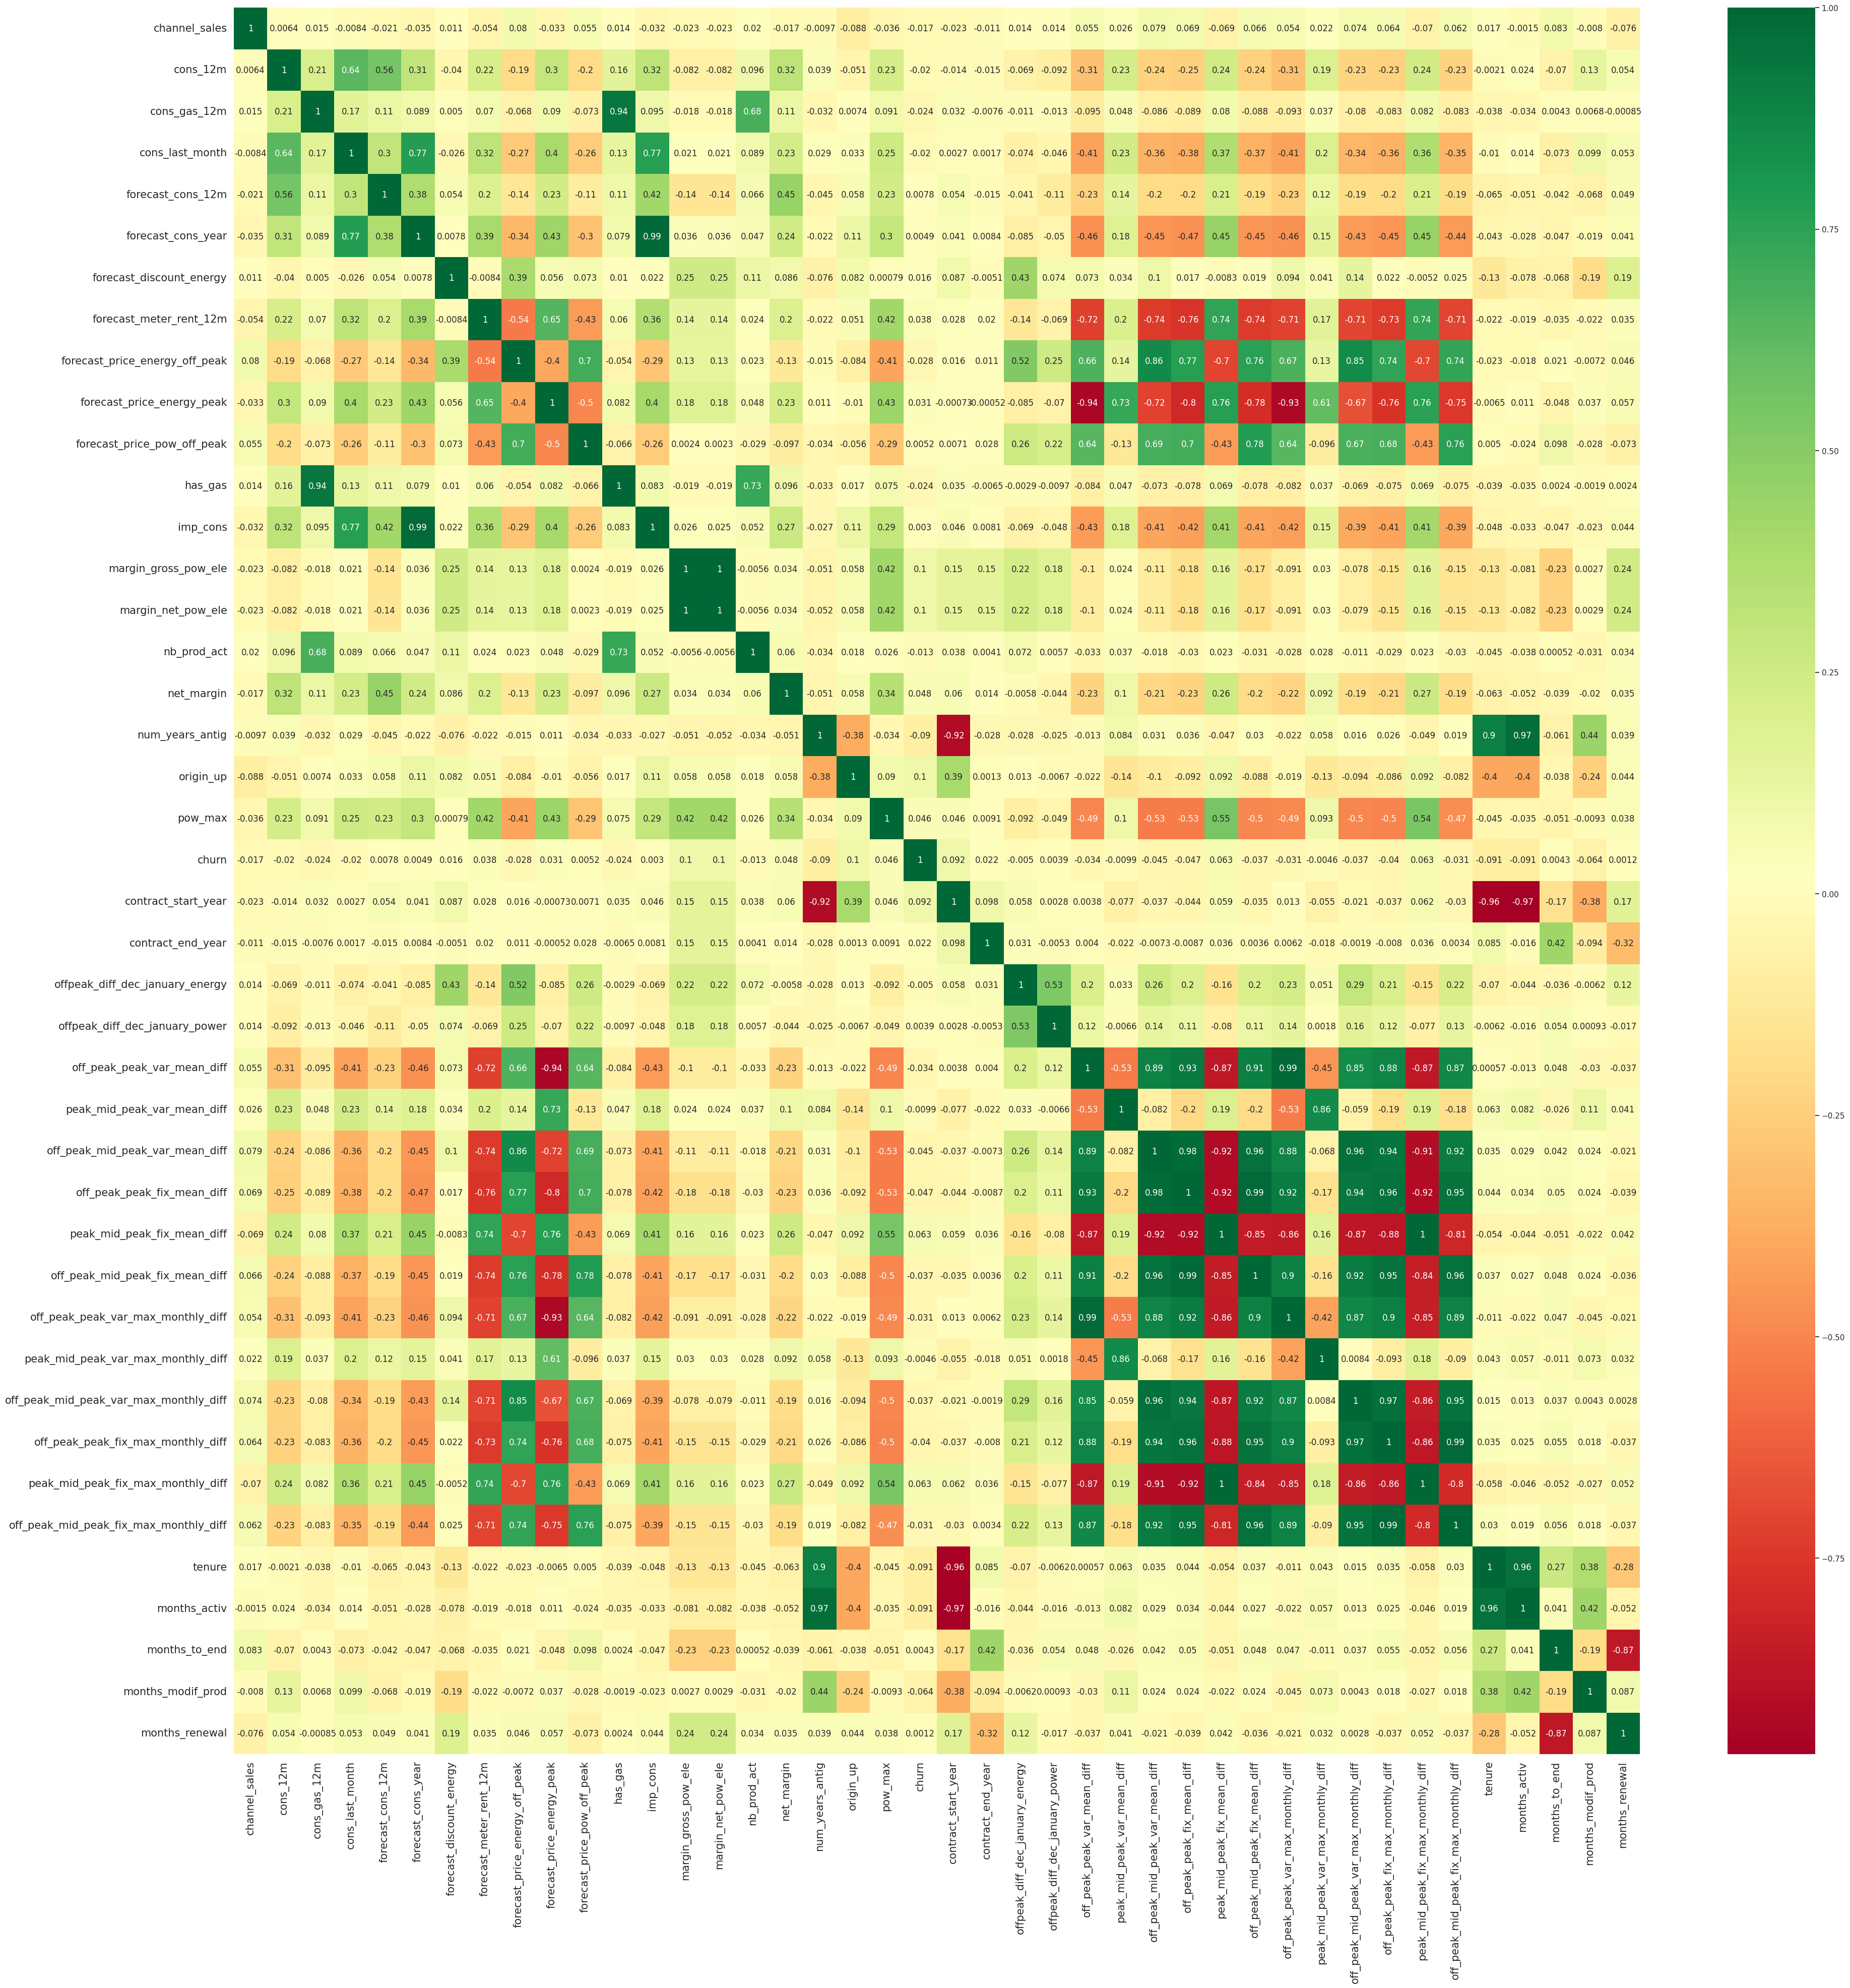

In [190]:
# Correlation Heatmap
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12},
    cmap='RdYlGn'
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# View of graph
plt.show()

We will remove two variables, 'num_years_antig' and 'forecast_cons_year', due to their high correlation with other independent features.

In [191]:
data.drop(columns=['num_years_antig', 'forecast_cons_year'], inplace=True)
data.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,3,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,0.085483,0.146033,44.266930,8.145775,44.266930,3,30,5,1,6
1,3,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,0.089162,0.172468,44.444710,0.000000,44.444710,6,67,3,67,8
2,4,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,0.000000,0.153133,44.444710,0.000000,44.444710,6,67,2,67,8
3,6,3.919235,0.000000,3.300813,2.901970,0.0,1.493040,0.164775,0.086131,45.308378,...,0.088815,0.171746,44.266931,0.000000,44.266931,5,47,11,1,0
4,3,4.654157,0.000000,0.000000,3.906889,0.0,0.000000,0.166178,0.087538,44.311378,...,0.085058,0.167989,44.266930,0.000000,44.266930,5,48,10,48,0


# **Establishing Model Generalization**


Data sampling involves dividing our dataset into two subsets: a training set and a test set. The training set is used to train the predictive model, while the test set is used to evaluate its performance on unseen data. This process helps us assess how well the model generalizes to new, unseen data, which is crucial for evaluating its effectiveness.

In this case, we'll split the data into a 75-25 ratio, with 75% of the data used for training and 25% used for testing. This split is a common practice in machine learning, providing enough data for training while ensuring a sufficient amount for testing the model's performance. Adjustments to the split ratio can be made based on the specific characteristics of the dataset and the requirements of the problem at hand.

In [192]:
# Make a copy of the original DataFrame for training
train_df = data.copy()

# Separate features (X) and target variable (y)
X = data.drop(columns=['churn'])  # Features
y = data['churn']  # Target variable

In [193]:
X

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,3,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,0.085483,0.146033,44.266930,8.145775,44.266930,3,30,5,1,6
1,3,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,0.089162,0.172468,44.444710,0.000000,44.444710,6,67,3,67,8
2,4,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,0.000000,0.153133,44.444710,0.000000,44.444710,6,67,2,67,8
3,6,3.919235,0.000000,3.300813,2.901970,0.0,1.493040,0.164775,0.086131,45.308378,...,0.088815,0.171746,44.266931,0.000000,44.266931,5,47,11,1,0
4,3,4.654157,0.000000,0.000000,3.906889,0.0,0.000000,0.166178,0.087538,44.311378,...,0.085058,0.167989,44.266930,0.000000,44.266930,5,48,10,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,3,4.940252,0.000000,4.055684,2.853290,0.0,2.166785,0.120372,0.103487,40.606701,...,0.033742,0.055866,16.291555,8.145775,24.437330,3,34,1,34,10
10827,3,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,...,0.000000,0.148825,44.444710,0.000000,44.444710,3,42,4,7,18
10828,3,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,58.995952,...,0.026178,0.039017,22.682779,28.122958,50.805737,4,39,7,39,4
10829,3,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,...,0.033743,0.055866,16.291555,8.145775,24.437330,4,45,1,45,10


In [194]:
y

0        1
1        0
2        0
3        1
4        1
        ..
10826    0
10827    0
10828    1
10829    1
10830    0
Name: churn, Length: 10814, dtype: int64

In [195]:
print(X.shape)
print(y.shape)

(10814, 39)
(10814,)


In [196]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [197]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8110, 39)
(8110,)
(2704, 39)
(2704,)


# **Random Forest classifier**

- Random Forest classifier is a type of ensemble algorithm, which means it relies on multiple decision trees to make predictions. Each decision tree in the forest learns patterns from different splits of the data.
- Ensemble methods like Random Forest are powerful due to the principles of averaging, weak learners, and the central limit theorem. Instead of relying on a single decision tree, Random Forest trains thousands of them, each learning different patterns from the data.
- By aggregating the predictions of multiple decision trees, Random Forest reduces the risk of overfitting and captures a more comprehensive understanding of the data.
- Random Forest does not require feature scaling because it uses a rule-based approach instead of distance calculations, making it suitable for datasets with features of varying scales.
- It handles non-linear parameters effectively, outperforming linear models in scenarios where relationships between features and target variables are complex.
- However, training a Random Forest on large datasets can be computationally intensive and time-consuming due to the need to build a large ensemble of decision trees.

In [198]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)


Setting n_estimators to 1000 means that your Random Forest classifier will consist of 1000 decision trees. Each decision tree will be trained on a random subset of the training data, using a different subset of features.

Having a large number of decision trees in the ensemble increases the robustness and stability of the model. It helps to reduce overfitting and improve the generalization performance of the classifier. With 1000 decision trees, the Random Forest can capture a wide range of patterns and relationships in the data, leading to more accurate predictions.

However, it's important to note that increasing the number of estimators also increases the computational cost of training the model. Training a Random Forest with 1000 decision trees may require more time and computational resources compared to a smaller number of estimators.

In [199]:
# Prediction on test data
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# **Model Evaluation**

1. **Accuracy**: This metric measures the ratio of correctly predicted observations to the total observations. It gives an overall assessment of how well the model performs across all classes.

2. **Precision**: Precision evaluates the ability of the classifier to avoid labeling negative samples as positive. It calculates the ratio of true positive predictions to the total positive predictions made by the model.

3. **Recall**: Recall assesses the ability of the classifier to identify all positive samples correctly. It measures the ratio of true positive predictions to the total actual positive samples in the dataset.

4. **ROC & AUC**: Receiver Operating Characteristic (ROC) curve is a graphical representation of the true positive rate against the false positive rate. Area Under the ROC Curve (AUC) summarizes the ROC curve, providing a single score that represents the model's ability to discriminate between classes.

5. **K-Fold Cross Validation**: This technique involves splitting the dataset into k subsets, training the model on k-1 subsets, and validating it on the remaining subset. It helps to assess how well the model generalizes to unseen data and reduces the risk of overfitting.

Using these metrics collectively provides a comprehensive evaluation of the model's performance, considering factors such as accuracy, reliability in predicting positive cases, and the trade-off between true positives and false positives.

In [200]:
# Importing Model Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

In [201]:
# Display classification report
print("\n ----- Classification Report ----- \n")
print(classification_report(y_test, y_pred))


 ----- Classification Report ----- 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2431
           1       0.90      0.07      0.13       273

    accuracy                           0.91      2704
   macro avg       0.91      0.53      0.54      2704
weighted avg       0.91      0.91      0.87      2704



[[2429    2]
 [ 254   19]]


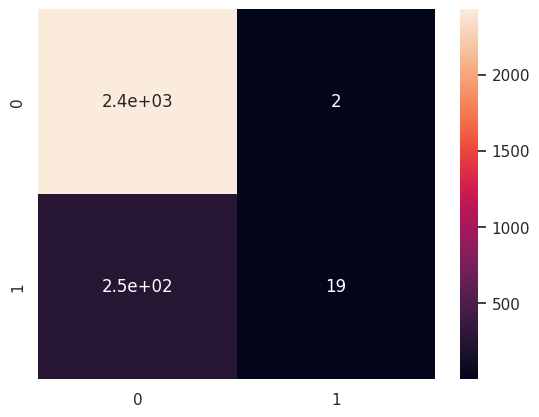

In [202]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

In [203]:
# Calculate model scores
scores = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"],
    "Score": [accuracy, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), auc]
}

# Create a DataFrame
scores_df = pd.DataFrame(scores)

print(scores_df)

      Metric     Score
0   Accuracy  0.905325
1  Precision  0.904762
2     Recall  0.069597
3   F1 Score  0.129252
4        AUC  0.534387


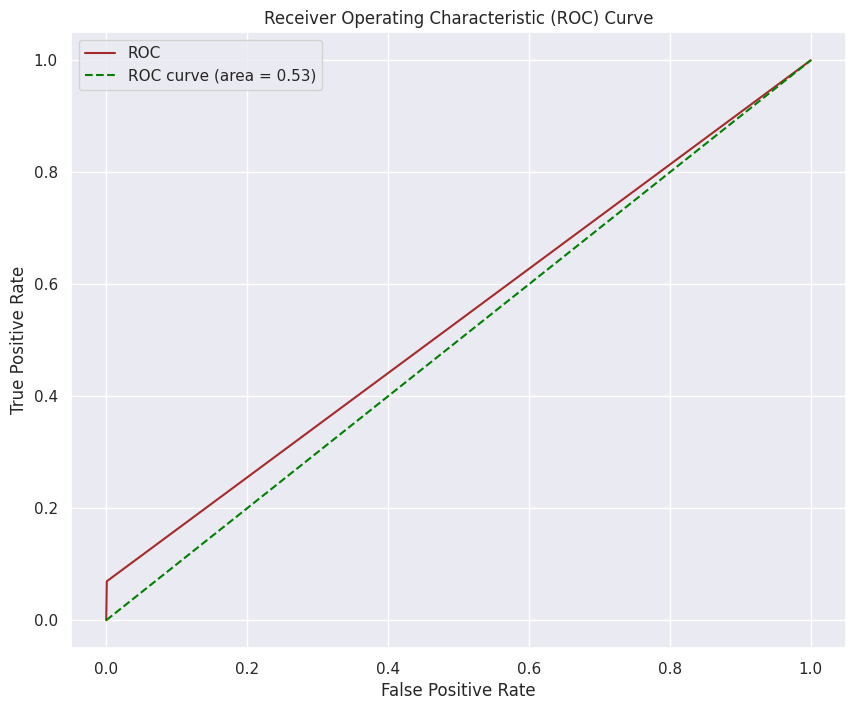

In [204]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='brown', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**K-fold Cross Validation**

The dataset is divided into k subsets or folds. The model is then trained on k-1 folds of the data and validated on the remaining fold. This process is repeated k times, with each fold used as the validation set exactly once. Finally, the performance metrics are averaged across all k iterations to provide a more reliable estimate of the model's performance. This technique helps to mitigate the variance in performance that may result from using a single train-test split, and provides a more robust evaluation of the model's generalization ability.

In [205]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.89765721 0.9001233  0.90073983 0.90567201 0.89950678]


We can assess the overall performance of the model by calculating the mean of the accuracy scores obtained from each fold during the cross-validation process. This summary statistic provides us with a single value that represents the average accuracy of the model across all the folds. By averaging the accuracy scores, we can obtain a more reliable estimate of the model's generalization performance compared to using a single train-test split.

In [206]:
# Compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.9007


# **Understanding Feature Importance in Random Forest Classifier**

- **Feature importance**: This metric helps us understand which features have the most influence on the model's predictions.
- **Random Forest classifier**: Utilizing this classifier, we can easily access feature_importances as it offers a built-in approach for this purpose.
- **Calculation method**: Feature importance indicates how frequently each feature is utilized for splitting across all trees in the Random Forest ensemble.
- **Significance**: Features with higher importance are deemed to have more impact on the model's predictions, whereas those with lower importance contribute less.

In [207]:
# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({
    'features': X_train.columns,  # Column names
    'importance': rf_classifier.feature_importances_  # Feature importances from the trained random forest classifier
})

# Sort the DataFrame by importance values in ascending order
feature_importances = feature_importances.sort_values(by='importance', ascending=True)

# Reset index for the DataFrame
feature_importances = feature_importances.reset_index(drop=True)


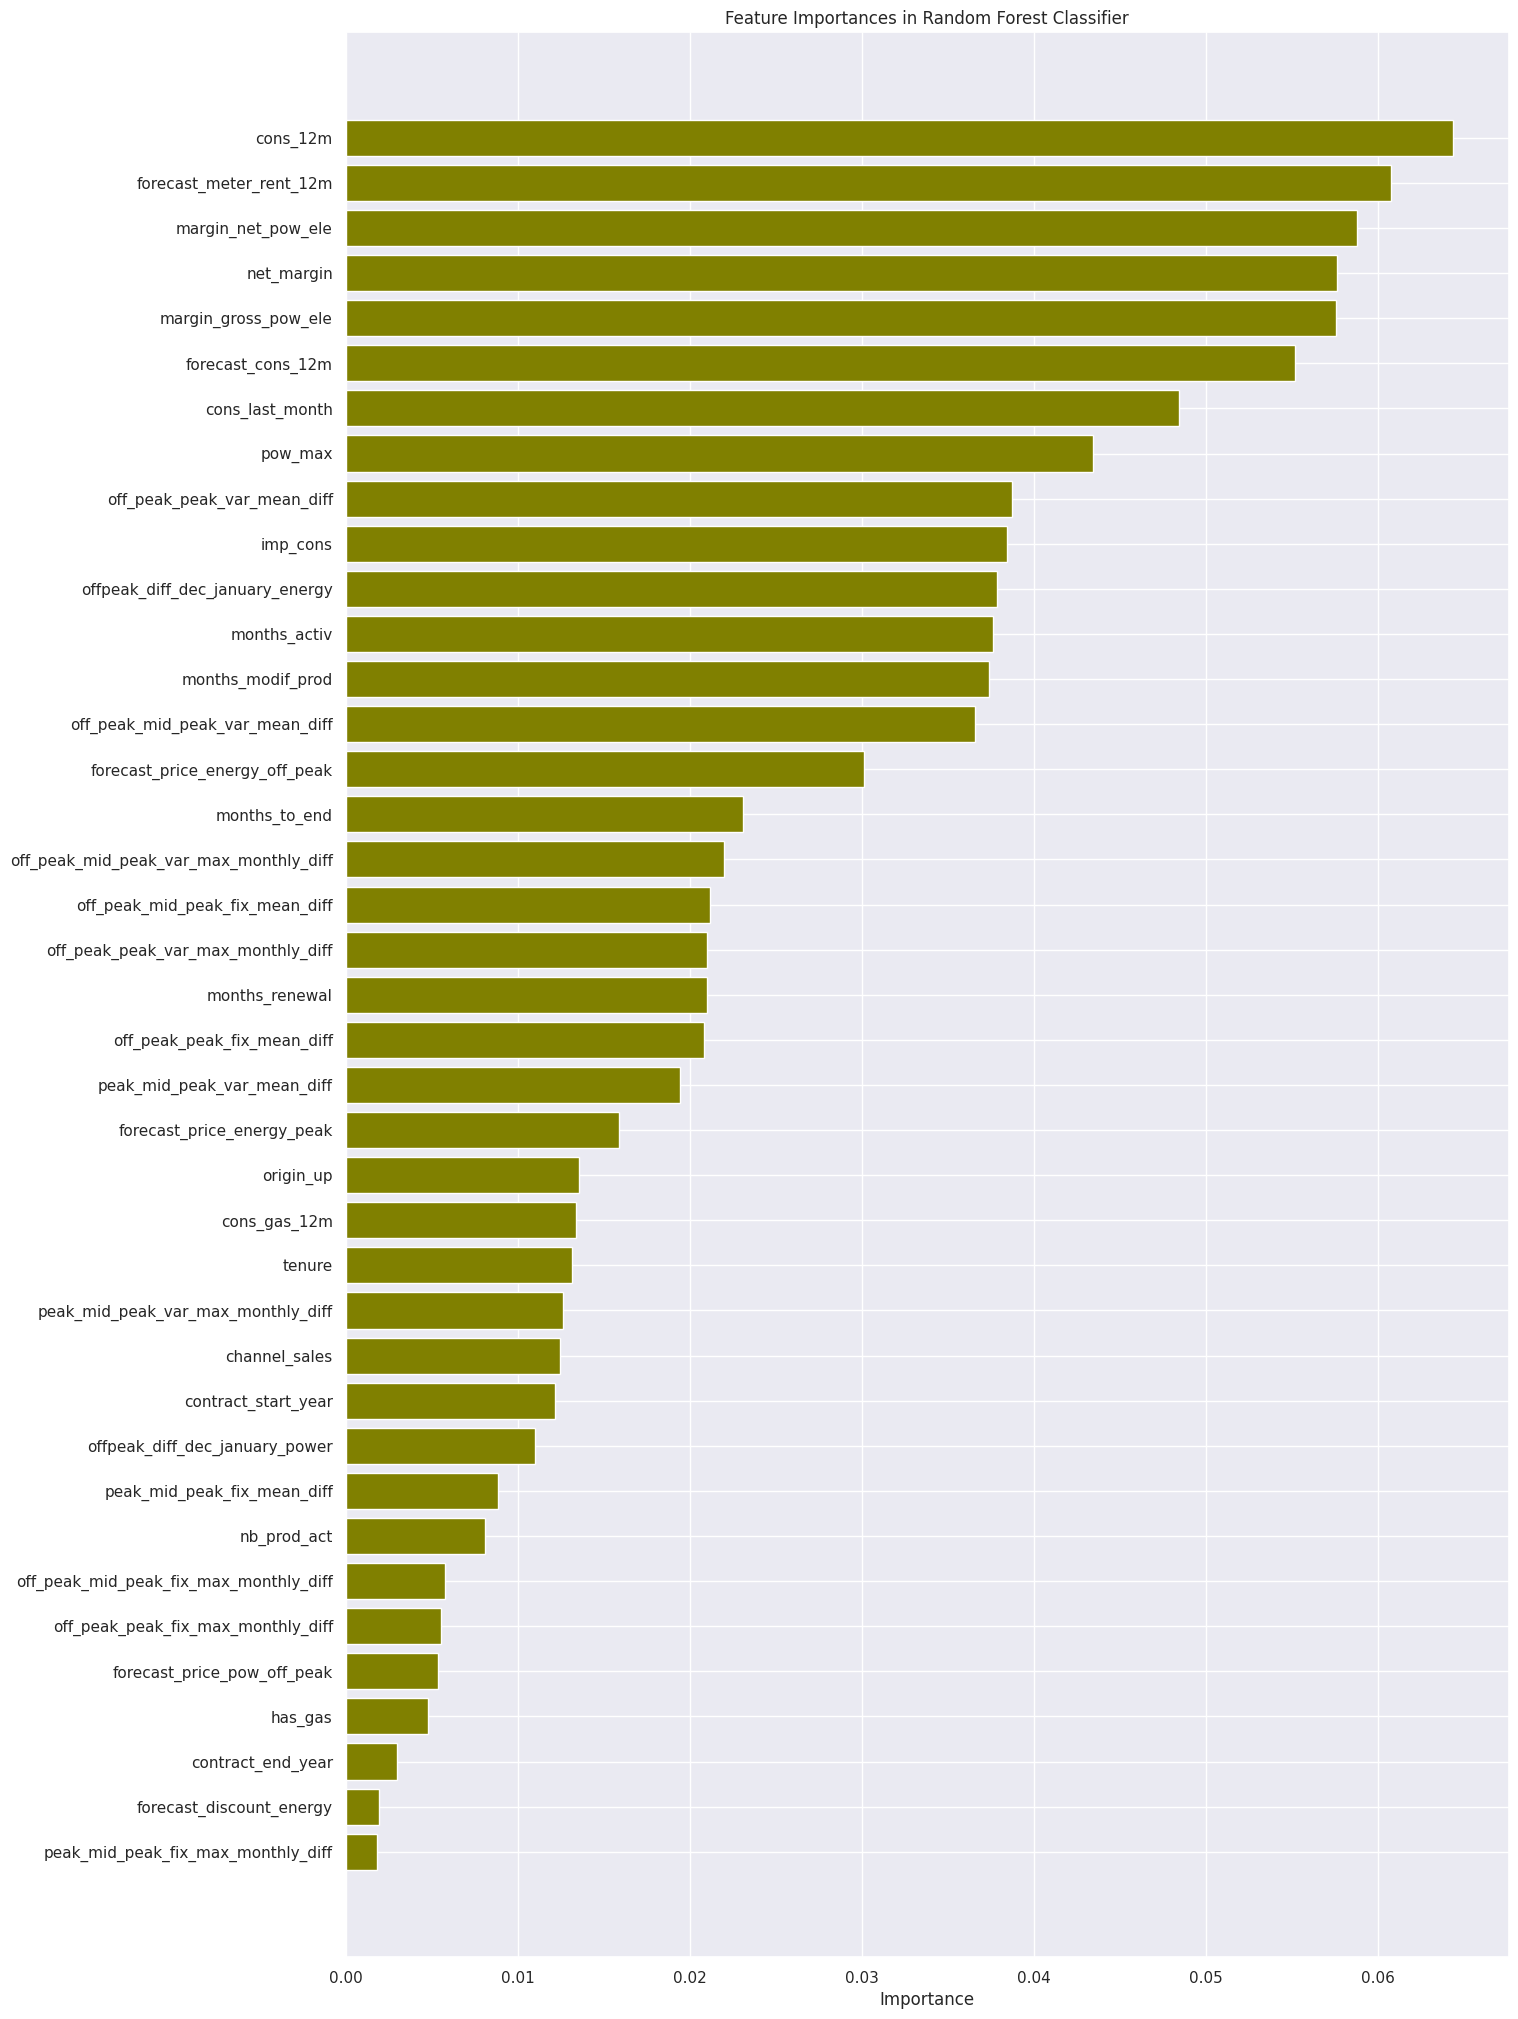

In [208]:
# Plot the values

plt.figure(figsize=(15, 25))
plt.title('Feature Importances in Random Forest Classifier')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='olive', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()


**Key Observations from Feature Importances:**

1. **Net Margin on Power Subscription and Consumption**: The net margin over 12 months emerges as a primary driver for churn, indicating that customers' financial considerations significantly influence their decision to churn.

2. **Forecasted Bill of Meter Rental**: The forecasted bill for meter rental in the upcoming months is also influential, suggesting that anticipated costs play a role in customers' decisions regarding churn.

3. **Time-Related Factors**: Metrics such as tenure, months active, and duration since the last contract update demonstrate notable importance, indicating that customer loyalty and engagement levels are significant determinants of churn.

4. **Effectiveness of Recommended Features**: Features suggested by colleagues show varying degrees of importance, with some outperforming others. This highlights the importance of feature selection and refinement in predictive modeling.

5. **Price Sensitivity Features**: While price sensitivity features are present, they do not emerge as dominant drivers of churn. However, their presence indicates that pricing strategies may still influence customer behavior, albeit to a lesser extent than other factors.

**Implications for Hypothesis Testing:**
The analysis suggests that while price sensitivity is a factor in churn prediction, it may not be the primary driver. Further experimentation and analysis are warranted to validate this hypothesis conclusively.

In [209]:
# Generate predicted probabilities for class 1 (churn)
proba_predictions = rf_classifier.predict_proba(X_test)

# Extract probabilities for class 1 (churn)
probabilities = proba_predictions[:, 1]

In [210]:
# Reset the index of the X_test DataFrame
X_test = X_test.reset_index()

# Drop the 'index' column
X_test.drop(columns='index', inplace=True)

In [211]:
# Add the predicted churn values and probabilities to the X_test DataFrame
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()

# Save the X_test DataFrame with predicted data to a CSV file
X_test.to_csv('predicted_data.csv')

### Business Impact Analysis of Discount Strategy

**Workflow:**
1. Calculate the forecast revenue for customers when no discount is offered.
2. Calculate the forecast revenue for customers when a 20% discount is offered to those with a high propensity to churn, based on a probability cutoff.
3. Determine the optimal probability cutoff to maximize revenue.

**Key Points:**
- By offering a 20% discount to customers with a high propensity to churn, we aim to incentivize them to stay with PowerCo.
- The analysis involves comparing the forecasted revenue with and without the discount strategy to assess its impact on revenue generation.
- We need to identify the probability cutoff that maximizes revenue, balancing the potential loss from offering discounts with the expected revenue increase from retaining customers.

# **Loading and Preprocessing Predicted Data**

In [212]:
# Read the predicted data from the CSV file
test_data = pd.read_csv('predicted_data.csv')

# Remove the first column (index) from the DataFrame
test_data.drop(test_data.columns[0], axis=1, inplace=True)

# Display the first few rows of the DataFrame
test_data.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,churn,churn_probability
0,3,3.857513,0.00000,0.0,3.038119,0.0,1.434729,0.146694,0.000000,44.311378,...,44.44471,0.0,44.44471,4,43,3,43,8,0,0.038
1,3,3.877429,0.00000,0.0,2.674485,0.0,1.289366,0.144902,0.000000,44.311378,...,44.44471,0.0,44.44471,6,63,6,63,4,0,0.030
2,3,3.827757,0.00000,0.0,3.002373,0.0,1.312389,0.144902,0.000000,44.311378,...,44.44471,0.0,44.44471,7,75,6,75,4,0,0.043
3,3,3.208710,3.28713,0.0,2.334454,0.0,1.192567,0.165214,0.087961,44.311378,...,44.44471,0.0,44.44471,6,66,4,66,7,0,0.076
4,3,4.510371,0.00000,0.0,2.453196,0.0,1.196176,0.141434,0.000000,44.311378,...,44.44471,0.0,44.44471,4,39,7,5,3,1,0.576


# **Calculating Baseline Revenue Estimate**

1. **Baseline Revenue Calculation**: Compute the baseline estimate of electricity revenue for each customer over the next twelve months based on forecast consumption, forecast price, and actual churn outcome. This estimate is termed as `basecase_revenue`.

2. **Adjustment for Churned Customers**: For customers who churned during the observation period, adjust the baseline revenue calculation to account for the lost revenue. This adjustment accounts for churn happening between January 2016 and the start of March 2016, assuming an average loss of 91.9% of revenue. The adjusted variable is named `basecase_revenue_after_churn`, calculated as `basecase_revenue * (1 - 0.919 * churn)`.

In [213]:
# Calculate baseline revenue estimate for each customer
test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

# Adjust baseline revenue for churned customers
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])
test_data.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
0,3,3.857513,0.00000,0.0,3.038119,0.0,1.434729,0.146694,0.000000,44.311378,...,44.44471,4,43,3,43,8,0,0.038,161.733130,161.733130
1,3,3.877429,0.00000,0.0,2.674485,0.0,1.289366,0.144902,0.000000,44.311378,...,44.44471,6,63,6,63,4,0,0.030,69.913504,69.913504
2,3,3.827757,0.00000,0.0,3.002373,0.0,1.312389,0.144902,0.000000,44.311378,...,44.44471,7,75,6,75,4,0,0.043,147.153354,147.153354
3,3,3.208710,3.28713,0.0,2.334454,0.0,1.192567,0.165214,0.087961,44.311378,...,44.44471,6,66,4,66,7,0,0.076,37.044005,37.044005
4,3,4.510371,0.00000,0.0,2.453196,0.0,1.196176,0.141434,0.000000,44.311378,...,44.44471,4,39,7,5,3,1,0.576,41.493551,3.360978


**Calculating Estimated Benefits and Costs of Intervention:**

1. Define a cut-off probability.
2. Identify customers with a churn probability higher than the cut-off to receive a discount.
3. Calculate the revenue in the intervention scenario:
   - Customers accepting the discount are assumed not to churn, so the retained revenue is 80% of the baseline revenue.
   - Customers not receiving the discount are assumed to churn based on observed data.
4. Map out the revenue delta as a function of the cut-off probability to find the optimal cut-off point that maximizes revenue.
5. Consider counterbalancing effects:
   - True positives: Retained revenue vs. no-discount scenario
   - False positives: Reduced revenue from unnecessary discounts
6. The optimal cut-off balances the benefits of true positives against the costs of false positives.

**Summary of Steps:**

- Define cut-off probability.
- Identify eligible customers for discount.
- Calculate revenue in intervention scenario.
- Determine revenue delta vs. cut-off probability.
- Find optimal cut-off balancing true positives and false positives.

In [214]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Calculate the revenue delta for offering discount to customers with predicted churn risk >= cutoff.

    Parameters:
        pred (pd.DataFrame): DataFrame containing predicted churn probabilities and baseline revenue information.
        cutoff (float): Probability cutoff for offering discount. Default is 0.5.
        discount (float): Discount percentage offered to eligible customers. Default is 0.2 (20%).

    Returns:
        float: Total revenue delta from offering discount to eligible customers.
    """
    # Calculate discounted revenue for eligible customers
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Calculate revenue delta for each customer
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    # Return total revenue delta
    return pred['revenue_delta'].sum()


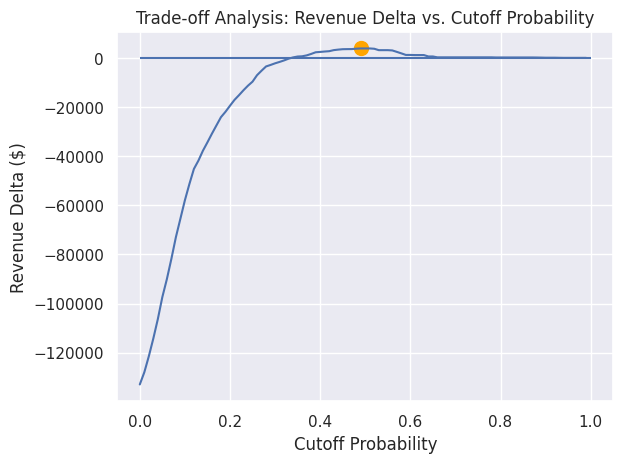

Maximum benefit at cutoff 0.49 with revenue delta of $3,870.75


In [215]:
# Generate a collection of potential cutoff probabilities alongside their respective total revenue deltas.
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    """
    Plot the revenue deltas against different cutoff probabilities for offering discounts.

    Parameters:
        rev_deltas (pd.Series): Series containing revenue deltas for different cutoff probabilities.
    """
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.xlabel('Cutoff Probability')
    plt.ylabel('Revenue Delta ($)')
    plt.title('Trade-off Analysis: Revenue Delta vs. Cutoff Probability')
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)


In this scenario:

- **Strategic Considerations**: Prioritizing large-revenue customers for discount offers may not be advantageous, as the overall revenue delta is lower compared to targeting all customers.
  
- **Intervention Scope**: The effectiveness of targeting large-revenue customers depends on the intervention's nature. If interventions involve additional costs that scale with the number of customers targeted, it may be beneficial to focus on a subset of customers to minimize costs, even if it reduces the revenue delta.

- **Beyond Pricing Adjustments**: While pricing adjustments are considered here, interventions often extend beyond simple price changes to prevent churn. Additional strategies such as enhancing customer relations or assigning key account managers may incur variable costs based on the number of customers targeted.

- **Strategic Flexibility**: The decision to target specific customer segments for interventions should consider both the potential revenue impact and the associated costs. Flexibility in targeting allows for strategic adjustments to optimize the balance between revenue retention and intervention costs.

**Optimizing Revenue Impact for High-Value Customers**

1. Function Objective: The function `get_rev_delta_high_value` aims to calculate the revenue delta for offering discounts specifically to high-value customers who are at risk of churning.

2. Discount Strategy: Discounts are offered to customers with a predicted churn risk exceeding the specified cutoff, but only if their baseline revenue exceeds a minimum threshold (min_rev).

3. Retention Impact: For high-value customers predicted to churn, discounts are applied to encourage retention for the full year. This approach ensures that valuable customers are prioritized for retention efforts.

4. Revenue Assessment: The function computes the revenue delta, representing the difference between discounted revenue and baseline revenue after churn, for all eligible high-value customers.

5. Strategic Focus: By focusing on high-value customers and their revenue impact, the function facilitates a targeted approach to discount allocation, optimizing revenue outcomes while maximizing retention efforts.

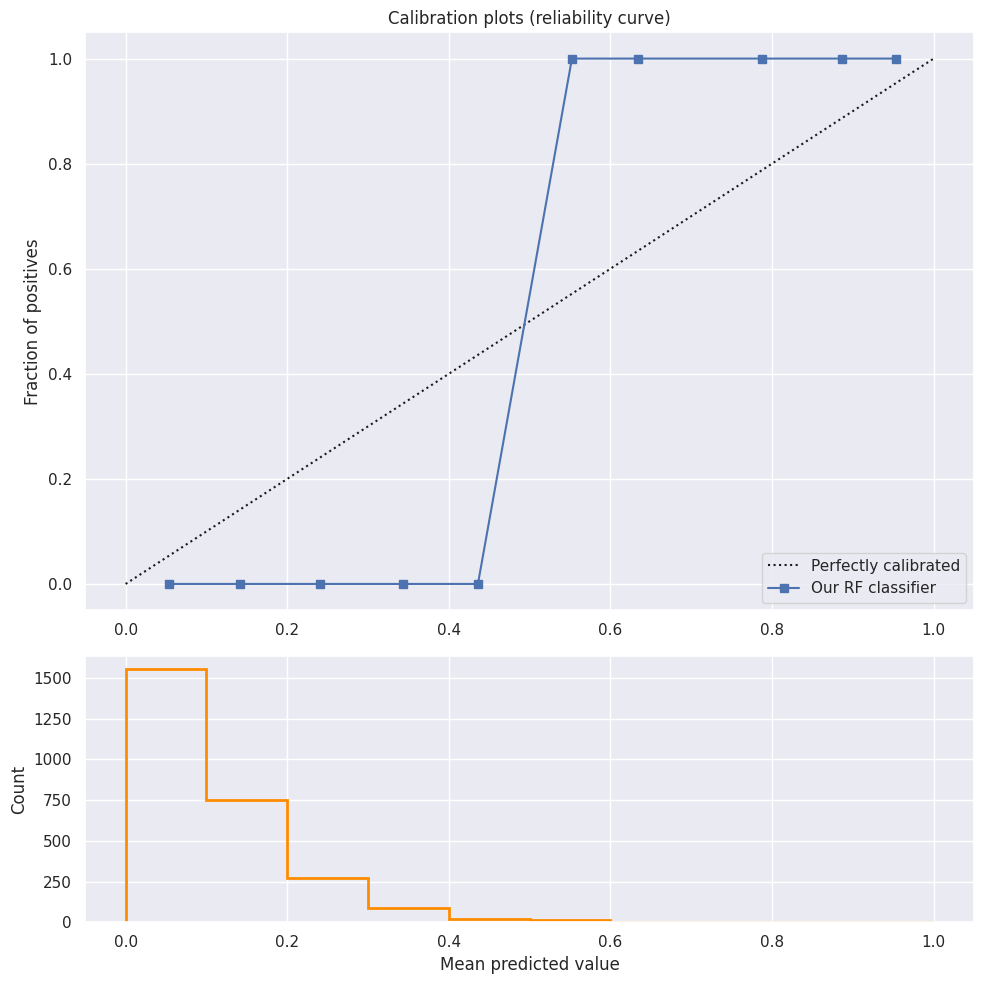

In [216]:
# Calibration Plots for Reliability Curve
"""
Explanation: The figure displays two plots illustrating the calibration of the Random Forest classifier.
The top plot represents the calibration curve, comparing the predicted churn probabilities against the actual fraction of positives
(churned customers). The bottom histogram showcases the distribution of churn probabilities predicted by the classifier.
"""

from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_data['churn'],
    y_prob=test_data['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_data['churn_probability'], range=(0, 1), bins=10, color='darkorange', histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

- The calibration curve at the top illustrates a sigmoid shape, indicating that the classifier tends to be under-confident in its predictions.
- In the bottom histogram, we observe a positive skew in the distribution of predicted probabilities, suggesting that the model tends to assign higher probabilities more frequently, possibly due to its low confidence in making predictions.

In [217]:
# Calculate basecase revenue for each customer
test_data['basecase_revenue'] = np.power(10, test_data['forecast_cons_12m']) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

# Adjust basecase revenue after churn for each customer based on churn probability
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn_probability'])

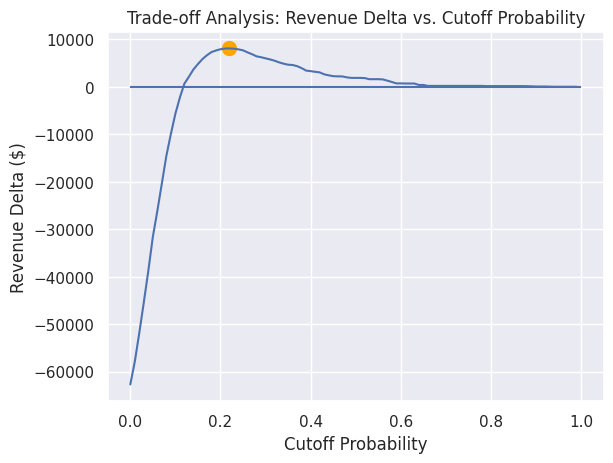

Maximum benefit at cutoff 0.22 with revenue delta of $8,104.43


In [218]:
# Generate revenue deltas for different cutoff probabilities
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

# Plot the tradeoff between cutoff probabilities and revenue deltas
plot_tradeoff(rev_deltas)

In a real-time scenario, the conclusion would be that implementing a discount intervention strategy targeted at customers with a churn probability above 0.22 can lead to significant revenue gains. This suggests that the company can effectively allocate resources towards retaining customers who are more likely to churn based on the predictive model. By focusing on these high-risk customers, the company can optimize its retention efforts and improve overall revenue performance.